In [1]:
import networkx as nx
from imdb_code import get_movie_distance, get_movie_distance_bi
import asyncio
import nest_asyncio
import aiohttp
import matplotlib.pyplot as plt
nest_asyncio.apply()

In [2]:
actors = {
    'Dwayne Johnson': 'https://www.imdb.com/name/nm0425005/', 
    'Chris Hemsworth': 'https://www.imdb.com/name/nm1165110/', 
    'Robert Downey Jr.': 'https://www.imdb.com/name/nm0000375/',
    'Akshay Kumar': 'https://www.imdb.com/name/nm0474774/', 
    'Jackie Chan': 'https://www.imdb.com/name/nm0000329/', 
    'Bradley Cooper': 'https://www.imdb.com/name/nm0177896/', 
    'Adam Sandler': 'https://www.imdb.com/name/nm0001191/',
    'Scarlett Johansson': 'https://www.imdb.com/name/nm0424060/', 
    'Sofia Vergara': 'https://www.imdb.com/name/nm0005527/' ,
    'Chris Evans': 'https://www.imdb.com/name/nm0262635/'
}


In [3]:
actors_list = list(actors.keys())
actors_list

['Dwayne Johnson',
 'Chris Hemsworth',
 'Robert Downey Jr.',
 'Akshay Kumar',
 'Jackie Chan',
 'Bradley Cooper',
 'Adam Sandler',
 'Scarlett Johansson',
 'Sofia Vergara',
 'Chris Evans']

In [19]:
actors_limit_5 = [('Dwayne Johnson', 'Chris Hemsworth'), ('Dwayne Johnson', 'Robert Downey Jr.'), ('Dwayne Johnson', 'Scarlett Johansson'), ('Dwayne Johnson', 'Chris Evans'), ('Chris Hemsworth', 'Robert Downey Jr.'), ('Chris Hemsworth', 'Jackie Chan'),
('Chris Hemsworth', 'Scarlett Johansson'), ('Chris Evans', 'Chris Hemsworth'), ('Robert Downey Jr.', 'Scarlett Johansson'),
('Bradley Cooper', 'Scarlett Johansson'), ('Bradley Cooper', 'Chris Evans'), ('Adam Sandler', 'Scarlett Johansson'), ('Chris Evans', 'Scarlett Johansson'), ('Sofia Vergara', 'Chris Evans'), ('Chris Evans', 'Robert Downey Jr.')]

In [20]:
distances = dict()

In [21]:
async def get_data():
    async with aiohttp.ClientSession() as session:
        print('session')
        for (start_actor, end_actor) in actors_limit_5:
            distance = await get_movie_distance(start_actor, end_actor, session, 5, 5)
            distances[(start_actor, end_actor)] = distance
    print('complete for limit 5')


In [22]:
loop = asyncio.get_event_loop()
loop.run_until_complete(get_data())

session
2
complete
Dwayne Johnson Chris Hemsworth 2
2
complete
Dwayne Johnson Robert Downey Jr. 2
2
complete
Dwayne Johnson Scarlett Johansson 2
2
complete
Dwayne Johnson Chris Evans 2
complete
Chris Hemsworth Robert Downey Jr. 1
2
complete
Chris Hemsworth Jackie Chan 2
complete
Chris Hemsworth Scarlett Johansson 1
complete
Chris Evans Chris Hemsworth 1
complete
Robert Downey Jr. Scarlett Johansson 1
complete
Bradley Cooper Scarlett Johansson 1
complete
Bradley Cooper Chris Evans 1
2
complete
Adam Sandler Scarlett Johansson 2
complete
Chris Evans Scarlett Johansson 1
2
complete
Sofia Vergara Chris Evans 2
complete
Chris Evans Robert Downey Jr. 1
complete for limit 5


In [23]:
distances

{('Dwayne Johnson', 'Chris Hemsworth'): 2,
 ('Dwayne Johnson', 'Robert Downey Jr.'): 2,
 ('Dwayne Johnson', 'Scarlett Johansson'): 2,
 ('Dwayne Johnson', 'Chris Evans'): 2,
 ('Chris Hemsworth', 'Robert Downey Jr.'): 1,
 ('Chris Hemsworth', 'Jackie Chan'): 2,
 ('Chris Hemsworth', 'Scarlett Johansson'): 1,
 ('Chris Evans', 'Chris Hemsworth'): 1,
 ('Robert Downey Jr.', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Chris Evans'): 1,
 ('Adam Sandler', 'Scarlett Johansson'): 2,
 ('Chris Evans', 'Scarlett Johansson'): 1,
 ('Sofia Vergara', 'Chris Evans'): 2,
 ('Chris Evans', 'Robert Downey Jr.'): 1}

In [ ]:
async def get_data():
    async with aiohttp.ClientSession() as session:
        print('session')
        for (start_actor, end_actor) in actors_limit_5_10:
            distance = await get_movie_distance(start_actor, end_actor, session, 5, 10)
            distances[(start_actor, end_actor)] = distance
    print('complete for limit 5')

In [49]:
switch_actors = [('Dwayne Johnson', 'Jackie Chan'), ('Bradley Cooper', 'Dwayne Johnson'), ('Adam Sandler', 'Dwayne Johnson'),('Dwayne Johnson', 'Sofia Vergara'), ('Bradley Cooper', 'Chris Hemsworth'), ('Adam Sandler', 'Chris Hemsworth'), ('Chris Hemsworth', 'Sofia Vergara'),('Jackie Chan', 'Adam Sandler'), ('Scarlett Johansson', 'Sofia Vergara'), ('Adam Sandler', 'Sofia Vergara'), ('Robert Downey Jr.', 'Sofia Vergara'), ('Bradley Cooper', 'Sofia Vergara')]

In [40]:
async def get_data_2():
    async with aiohttp.ClientSession() as session:
        for (start_actor, end_actor) in switch_actors:
            distances[(start_actor, end_actor)] = await get_movie_distance(end_actor, start_actor, session, 10, 10)
    
    print('finisihed')

In [41]:
loop = asyncio.get_event_loop()
loop.run_until_complete(get_data_2())

2
complete
Jackie Chan Dwayne Johnson 2
2
complete
Dwayne Johnson Bradley Cooper 2
2
complete
Dwayne Johnson Adam Sandler 2
2
complete
Sofia Vergara Dwayne Johnson 2
2
complete
Chris Hemsworth Bradley Cooper 2
2
complete
Chris Hemsworth Adam Sandler 2
2
complete
Sofia Vergara Chris Hemsworth 2
2
complete
Adam Sandler Jackie Chan 2
complete
Sofia Vergara Scarlett Johansson 1
2
complete
Sofia Vergara Adam Sandler 2
complete
Sofia Vergara Robert Downey Jr. 1
finisihed


In [2]:
distances = {('Dwayne Johnson', 'Chris Hemsworth'): 2,
 ('Dwayne Johnson', 'Robert Downey Jr.'): 2,
 ('Dwayne Johnson', 'Scarlett Johansson'): 2,
 ('Dwayne Johnson', 'Chris Evans'): 2,
 ('Chris Hemsworth', 'Robert Downey Jr.'): 1,
 ('Chris Hemsworth', 'Jackie Chan'): 2,
 ('Chris Hemsworth', 'Scarlett Johansson'): 1,
 ('Chris Evans', 'Chris Hemsworth'): 1,
 ('Robert Downey Jr.', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Chris Evans'): 1,
 ('Adam Sandler', 'Scarlett Johansson'): 2,
 ('Chris Evans', 'Scarlett Johansson'): 1,
 ('Sofia Vergara', 'Chris Evans'): 2,
 ('Chris Evans', 'Robert Downey Jr.'): 1,
 ('Dwayne Johnson', 'Jackie Chan'): 2,
 ('Bradley Cooper', 'Dwayne Johnson'): 2,
 ('Adam Sandler', 'Dwayne Johnson'): 2,
 ('Dwayne Johnson', 'Sofia Vergara'): 2,
 ('Akshay Kumar', 'Chris Hemsworth'): 'infinite',
 ('Bradley Cooper', 'Chris Hemsworth'): 2,
 ('Adam Sandler', 'Chris Hemsworth'): 2,
 ('Chris Hemsworth', 'Sofia Vergara'): 2,
 ('Jackie Chan', 'Bradley Cooper'): 'infinite',
 ('Jackie Chan', 'Adam Sandler'): 2,
 ('Jackie Chan', 'Robert Downey Jr.'): 2,
 ('Bradley Cooper', 'Robert Downey Jr.'): 1,
 ('Adam Sandler', 'Robert Downey Jr.'): 2,
 ('Scarlett Johansson', 'Sofia Vergara'): 1,
 ('Adam Sandler', 'Chris Evans'): 2,
 ('Adam Sandler', 'Sofia Vergara'): 2,
 ('Bradley Cooper', 'Sofia Vergara'): 2,
 ('Adam Sandler', 'Bradley Cooper'): 2,
 ('Robert Downey Jr.', 'Sofia Vergara'): 1,
 ('Jackie Chan', 'Scarlett Johansson'): 2,
 ('Jackie Chan', 'Chris Evans'): 2}

In [38]:
actors_to_check_10 = [('Jackie Chan', 'Robert Downey Jr.'), ('Bradley Cooper', 'Robert Downey Jr.'), ('Adam Sandler', 'Robert Downey Jr.'), ('Scarlett Johansson', 'Sofia Vergara'), ('Adam Sandler', 'Chris Evans'), ('Adam Sandler', 'Bradley Cooper')]

In [34]:
async def get_data_3():
    async with aiohttp.ClientSession() as session:
        for (start_actor, end_actor) in actors_to_check_10:
            distances[(start_actor, end_actor)] = await get_movie_distance(start_actor, end_actor, session, 10, 10)
    
    print('finisihed')

In [35]:
loop = asyncio.get_event_loop()
loop.run_until_complete(get_data_3())

2
complete
Jackie Chan Robert Downey Jr. 2
complete
Bradley Cooper Robert Downey Jr. 1
2
complete
Adam Sandler Robert Downey Jr. 2
2
2
complete
Adam Sandler Chris Evans 2
2
2
2
complete
Adam Sandler Bradley Cooper 2
2
finisihed


In [50]:
jackie_chan_actors = [('Jackie Chan', 'Scarlett Johansson'), ('Jackie Chan', 'Chris Evans')]

In [51]:
async def get_data_4():
    async with aiohttp.ClientSession() as session:
        for (start_actor, end_actor) in jackie_chan_actors:
            distances[(start_actor, end_actor)] = await get_movie_distance(start_actor, end_actor, session, 10, 10)
    
    print('finisihed')

In [52]:
loop = asyncio.get_event_loop()
loop.run_until_complete(get_data_4())

2
complete
Jackie Chan Scarlett Johansson 2
2
complete
Jackie Chan Chris Evans 2
finisihed


In [53]:
distances

{('Dwayne Johnson', 'Chris Hemsworth'): 2,
 ('Dwayne Johnson', 'Robert Downey Jr.'): 2,
 ('Dwayne Johnson', 'Scarlett Johansson'): 2,
 ('Dwayne Johnson', 'Chris Evans'): 2,
 ('Chris Hemsworth', 'Robert Downey Jr.'): 1,
 ('Chris Hemsworth', 'Jackie Chan'): 2,
 ('Chris Hemsworth', 'Scarlett Johansson'): 1,
 ('Chris Evans', 'Chris Hemsworth'): 1,
 ('Robert Downey Jr.', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Chris Evans'): 1,
 ('Adam Sandler', 'Scarlett Johansson'): 2,
 ('Chris Evans', 'Scarlett Johansson'): 1,
 ('Sofia Vergara', 'Chris Evans'): 2,
 ('Chris Evans', 'Robert Downey Jr.'): 1,
 ('Dwayne Johnson', 'Jackie Chan'): 2,
 ('Bradley Cooper', 'Dwayne Johnson'): 2,
 ('Adam Sandler', 'Dwayne Johnson'): 2,
 ('Dwayne Johnson', 'Sofia Vergara'): 2,
 ('Akshay Kumar', 'Chris Hemsworth'): 'infinite',
 ('Bradley Cooper', 'Chris Hemsworth'): 2,
 ('Adam Sandler', 'Chris Hemsworth'): 2,
 ('Chris Hemsworth', 'Sofia Vergara'): 2,
 ('Jackie Chan'

In [122]:
akshey_actors = [('Chris Hemsworth', 'Akshay Kumar')]

In [131]:
async def get_data_akshey():
    async with aiohttp.ClientSession() as session:
        for (start_actor, end_actor) in akshey_actors:
            distances[(start_actor, end_actor)] = await get_movie_distance(start_actor, end_actor, session, 5, 20)
    
    print('finisihed')

In [21]:
#distances from previous trials. For the rest of paris, I cannot set the limit larger than 10, because I got banned after sending too many requests.

distances = {('Dwayne Johnson', 'Chris Hemsworth'): 2,
 ('Dwayne Johnson', 'Robert Downey Jr.'): 2,
 ('Dwayne Johnson', 'Scarlett Johansson'): 2,
 ('Dwayne Johnson', 'Chris Evans'): 2,
 ('Chris Hemsworth', 'Robert Downey Jr.'): 1,
 ('Chris Hemsworth', 'Jackie Chan'): 2,
 ('Chris Hemsworth', 'Scarlett Johansson'): 1,
 ('Chris Evans', 'Chris Hemsworth'): 1,
 ('Robert Downey Jr.', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Chris Evans'): 1,
 ('Adam Sandler', 'Scarlett Johansson'): 2,
 ('Chris Evans', 'Scarlett Johansson'): 1,
 ('Sofia Vergara', 'Chris Evans'): 2,
 ('Chris Evans', 'Robert Downey Jr.'): 1,
 ('Dwayne Johnson', 'Jackie Chan'): 2,
 ('Bradley Cooper', 'Dwayne Johnson'): 2,
 ('Adam Sandler', 'Dwayne Johnson'): 2,
 ('Dwayne Johnson', 'Sofia Vergara'): 2,
 ('Bradley Cooper', 'Chris Hemsworth'): 2,
 ('Adam Sandler', 'Chris Hemsworth'): 2,
 ('Chris Hemsworth', 'Sofia Vergara'): 2,
 ('Jackie Chan', 'Adam Sandler'): 2,
 ('Jackie Chan', 'Robert Downey Jr.'): 2,
 ('Bradley Cooper', 'Robert Downey Jr.'): 1,
 ('Adam Sandler', 'Robert Downey Jr.'): 2,
 ('Scarlett Johansson', 'Sofia Vergara'): 1,
 ('Adam Sandler', 'Chris Evans'): 2,
 ('Adam Sandler', 'Sofia Vergara'): 2,
 ('Bradley Cooper', 'Sofia Vergara'): 2,
 ('Adam Sandler', 'Bradley Cooper'): 2,
 ('Robert Downey Jr.', 'Sofia Vergara'): 1,
 ('Jackie Chan', 'Scarlett Johansson'): 2,
 ('Jackie Chan', 'Chris Evans'): 2,
 ('Akshay Kumar', 'Dwayne Johnson'): 2,
 ('Akshay Kumar', 'Jackie Chan'): 2,
 ('Akshay Kumar', 'Bradley Cooper'): 2,
 ('Akshay Kumar', 'Sofia Vergara'): 2,
 ('Akshay Kumar', 'Chris Evans'): 2}

In [22]:
G = nx.DiGraph()
edge_lists_1 = []
edge_lists_2 = []
for key, value in distances.items():
    (start_actor, end_actor) = key
    if value == 1:
        G.add_edge(start_actor, end_actor, edge_color = 'green')
    elif value == 2:
       G.add_edge(start_actor, end_actor, edge_color = 'red')

In [23]:
edge_lists_1 = [(u, v) for (u, v, d) in G.edges(data=True) if d['edge_color'] == 'green']
print(edge_lists_1)

[('Chris Hemsworth', 'Robert Downey Jr.'), ('Chris Hemsworth', 'Scarlett Johansson'), ('Robert Downey Jr.', 'Scarlett Johansson'), ('Robert Downey Jr.', 'Sofia Vergara'), ('Scarlett Johansson', 'Sofia Vergara'), ('Chris Evans', 'Chris Hemsworth'), ('Chris Evans', 'Scarlett Johansson'), ('Chris Evans', 'Robert Downey Jr.'), ('Bradley Cooper', 'Scarlett Johansson'), ('Bradley Cooper', 'Chris Evans'), ('Bradley Cooper', 'Robert Downey Jr.')]


In [24]:
edge_lists_2 = [(u, v) for (u, v, d) in G.edges(data=True) if d['edge_color'] == 'red']
print(edge_lists_2)

[('Dwayne Johnson', 'Chris Hemsworth'), ('Dwayne Johnson', 'Robert Downey Jr.'), ('Dwayne Johnson', 'Scarlett Johansson'), ('Dwayne Johnson', 'Chris Evans'), ('Dwayne Johnson', 'Jackie Chan'), ('Dwayne Johnson', 'Sofia Vergara'), ('Chris Hemsworth', 'Jackie Chan'), ('Chris Hemsworth', 'Sofia Vergara'), ('Jackie Chan', 'Adam Sandler'), ('Jackie Chan', 'Robert Downey Jr.'), ('Jackie Chan', 'Scarlett Johansson'), ('Jackie Chan', 'Chris Evans'), ('Bradley Cooper', 'Dwayne Johnson'), ('Bradley Cooper', 'Chris Hemsworth'), ('Bradley Cooper', 'Sofia Vergara'), ('Adam Sandler', 'Scarlett Johansson'), ('Adam Sandler', 'Dwayne Johnson'), ('Adam Sandler', 'Chris Hemsworth'), ('Adam Sandler', 'Robert Downey Jr.'), ('Adam Sandler', 'Chris Evans'), ('Adam Sandler', 'Sofia Vergara'), ('Adam Sandler', 'Bradley Cooper'), ('Sofia Vergara', 'Chris Evans'), ('Akshay Kumar', 'Dwayne Johnson'), ('Akshay Kumar', 'Jackie Chan'), ('Akshay Kumar', 'Bradley Cooper'), ('Akshay Kumar', 'Sofia Vergara'), ('Akshay K

In [109]:
edge_lists_1 == edge_lists_2

False

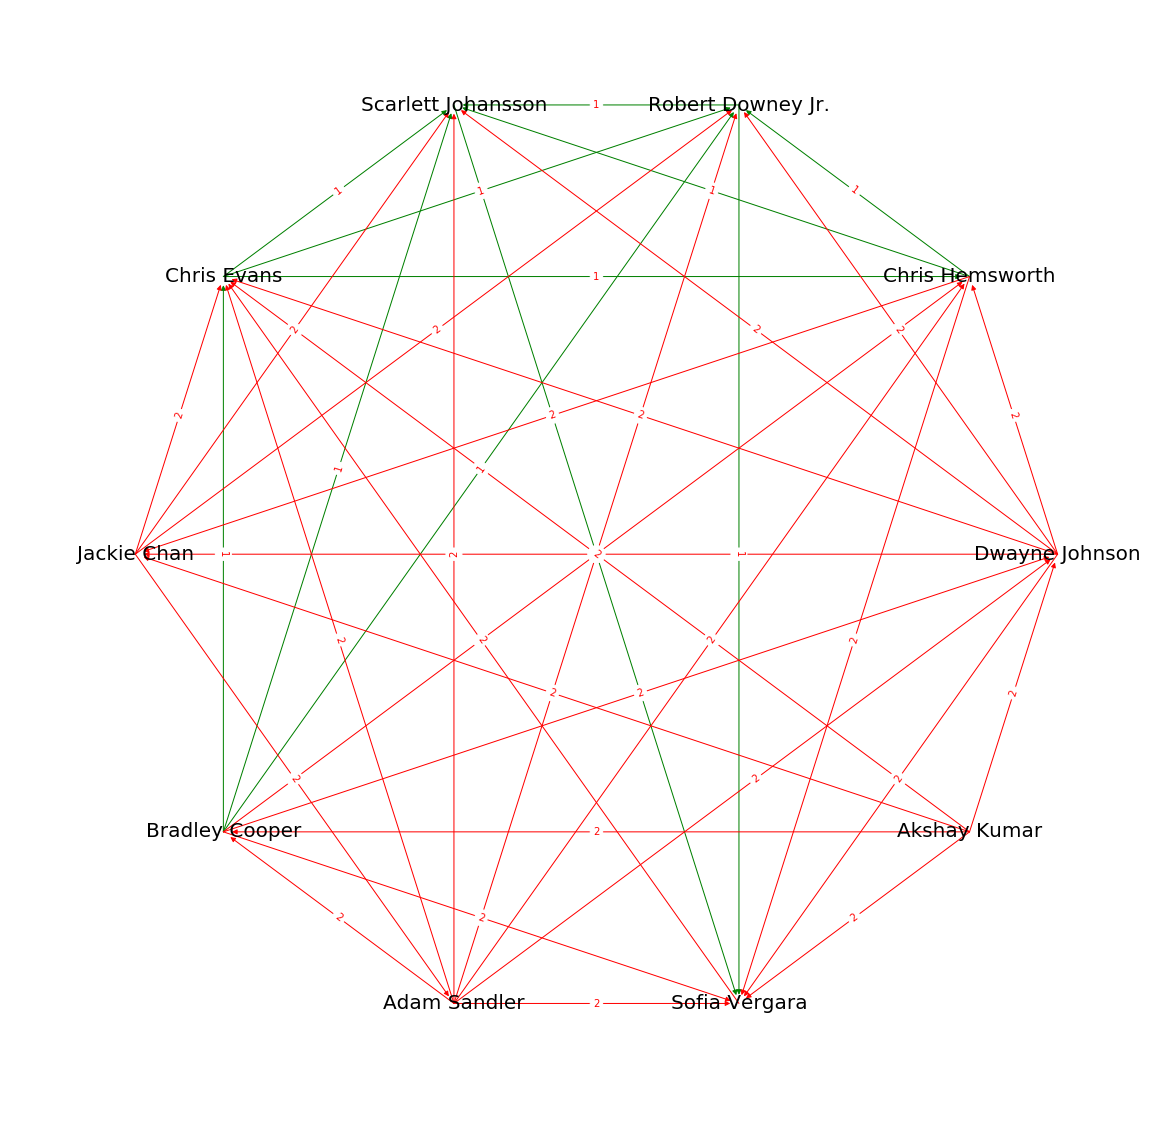

In [25]:
pos = nx.circular_layout(G)
fig = plt.figure(figsize=[20, 20])
nx.draw_networkx_edges(G, pos, edgelist= edge_lists_1, edge_color='green')
nx.draw_networkx_edges(G, pos, edgelist= edge_lists_2, edge_color='red')
nx.draw_networkx_labels(G, pos, font_size = 20, font_family = 'sans-serif')
nx.draw_networkx_edge_labels(G,pos,edge_labels=distances,font_color='red')
plt.axis('off')
plt.draw()

In [3]:
akshay_data = [('Akshay Kumar', 'Chris Hemsworth'), ('Akshay Kumar', 'Dwayne Johnson'), ('Akshay Kumar', 'Jackie Chan'), 
('Akshay Kumar', 'Bradley Cooper'), ('Adam Sandler', 'Akshay Kumar'), ('Adam Sandler', 'Akshay Kumar'), ('Akshay Kumar', 'Scarlett Johansson'), ('Akshay Kumar', 'Sofia Vergara'), ('Akshay Kumar', 'Chris Evans')]

In [4]:
async def get_data_test():
    async with aiohttp.ClientSession() as session:
        for (start_actor, end_actor) in akshay_data:
            distance = await get_movie_distance_bi(start_actor, end_actor, session, 10, 10)
            distances[(start_actor, end_actor)] = distance

    print('finisihed')

In [5]:
loop = asyncio.get_event_loop()
loop.run_until_complete(get_data_test())

complete
Akshay Kumar Dwayne Johnson 2
complete
Akshay Kumar Jackie Chan 2
complete
Akshay Kumar Bradley Cooper 2
complete
Akshay Kumar Sofia Vergara 2
complete
Akshay Kumar Chris Evans 2
finisihed


In [6]:
distances

{('Dwayne Johnson', 'Chris Hemsworth'): 2,
 ('Dwayne Johnson', 'Robert Downey Jr.'): 2,
 ('Dwayne Johnson', 'Scarlett Johansson'): 2,
 ('Dwayne Johnson', 'Chris Evans'): 2,
 ('Chris Hemsworth', 'Robert Downey Jr.'): 1,
 ('Chris Hemsworth', 'Jackie Chan'): 2,
 ('Chris Hemsworth', 'Scarlett Johansson'): 1,
 ('Chris Evans', 'Chris Hemsworth'): 1,
 ('Robert Downey Jr.', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Chris Evans'): 1,
 ('Adam Sandler', 'Scarlett Johansson'): 2,
 ('Chris Evans', 'Scarlett Johansson'): 1,
 ('Sofia Vergara', 'Chris Evans'): 2,
 ('Chris Evans', 'Robert Downey Jr.'): 1,
 ('Dwayne Johnson', 'Jackie Chan'): 2,
 ('Bradley Cooper', 'Dwayne Johnson'): 2,
 ('Adam Sandler', 'Dwayne Johnson'): 2,
 ('Dwayne Johnson', 'Sofia Vergara'): 2,
 ('Bradley Cooper', 'Chris Hemsworth'): 2,
 ('Adam Sandler', 'Chris Hemsworth'): 2,
 ('Chris Hemsworth', 'Sofia Vergara'): 2,
 ('Jackie Chan', 'Adam Sandler'): 2,
 ('Jackie Chan', 'Robert Dow

In [7]:
jackie_chan_data = [('Jackie Chan', 'Sofia Vergara'), ('Jackie Chan', 'Bradley Cooper')]

In [9]:
async def get_data_test_1():
    async with aiohttp.ClientSession() as session:
        for (start_actor, end_actor) in jackie_chan_data:
            distance = await get_movie_distance_bi(start_actor, end_actor, session, 10, 10)
            distances[(start_actor, end_actor)] = distance

    print('finisihed')

In [10]:
loop = asyncio.get_event_loop()
loop.run_until_complete(get_data_test_1())

complete
Jackie Chan Sofia Vergara 2
complete
Jackie Chan Bradley Cooper 2
finisihed


In [11]:
distances

{('Dwayne Johnson', 'Chris Hemsworth'): 2,
 ('Dwayne Johnson', 'Robert Downey Jr.'): 2,
 ('Dwayne Johnson', 'Scarlett Johansson'): 2,
 ('Dwayne Johnson', 'Chris Evans'): 2,
 ('Chris Hemsworth', 'Robert Downey Jr.'): 1,
 ('Chris Hemsworth', 'Jackie Chan'): 2,
 ('Chris Hemsworth', 'Scarlett Johansson'): 1,
 ('Chris Evans', 'Chris Hemsworth'): 1,
 ('Robert Downey Jr.', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Scarlett Johansson'): 1,
 ('Bradley Cooper', 'Chris Evans'): 1,
 ('Adam Sandler', 'Scarlett Johansson'): 2,
 ('Chris Evans', 'Scarlett Johansson'): 1,
 ('Sofia Vergara', 'Chris Evans'): 2,
 ('Chris Evans', 'Robert Downey Jr.'): 1,
 ('Dwayne Johnson', 'Jackie Chan'): 2,
 ('Bradley Cooper', 'Dwayne Johnson'): 2,
 ('Adam Sandler', 'Dwayne Johnson'): 2,
 ('Dwayne Johnson', 'Sofia Vergara'): 2,
 ('Bradley Cooper', 'Chris Hemsworth'): 2,
 ('Adam Sandler', 'Chris Hemsworth'): 2,
 ('Chris Hemsworth', 'Sofia Vergara'): 2,
 ('Jackie Chan', 'Adam Sandler'): 2,
 ('Jackie Chan', 'Robert Dow